### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')



In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
# Generate a frequency table for product category
category_freq = df['category'].value_counts()

# Display the top 5 most listed product categories
category_freq.head(5)

Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

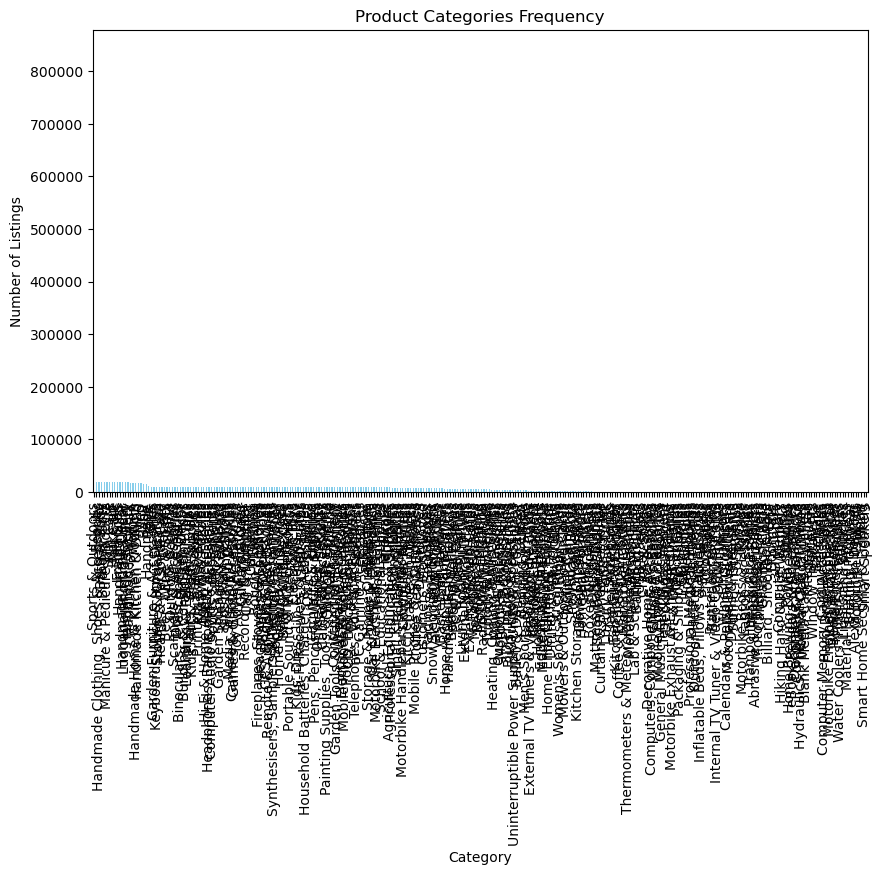

In [5]:
# Bar chart for product categories
plt.figure(figsize=(10,6))
category_freq.plot(kind='bar', color='skyblue')
plt.title('Product Categories Frequency')
plt.xlabel('Category')
plt.ylabel('Number of Listings')
plt.show()

In [6]:
top_5_categories = category_freq.head(5)

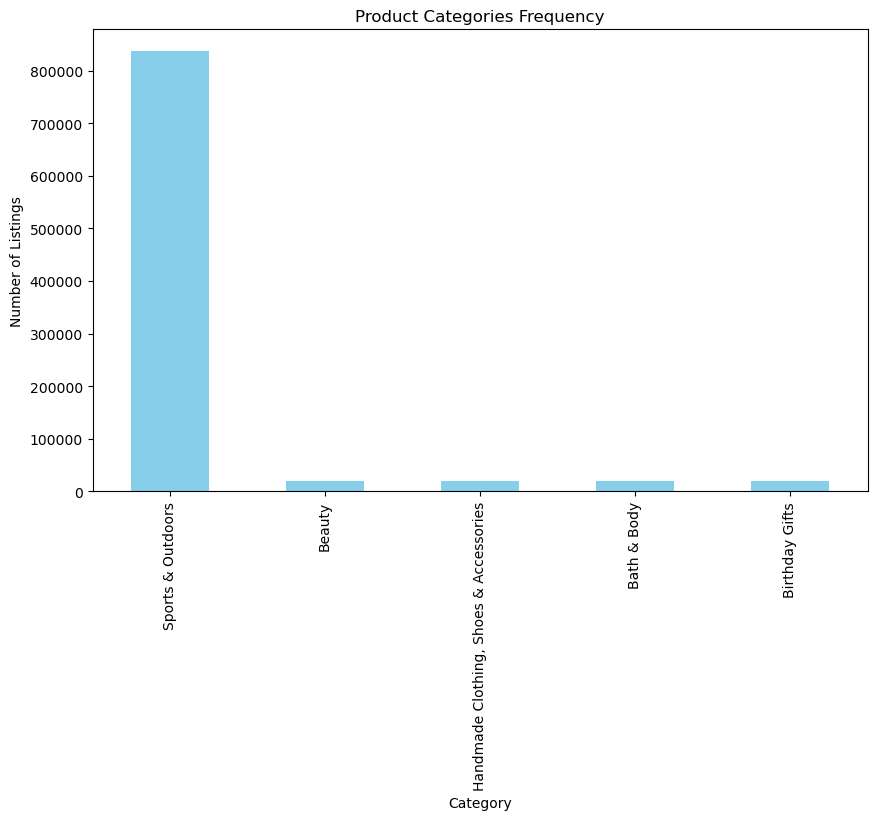

In [7]:
# Bar chart for top 5 product categories
plt.figure(figsize=(10,6))
top_5_categories.plot(kind='bar', color='skyblue')
plt.title('Product Categories Frequency')
plt.xlabel('Category')
plt.ylabel('Number of Listings')
plt.show()

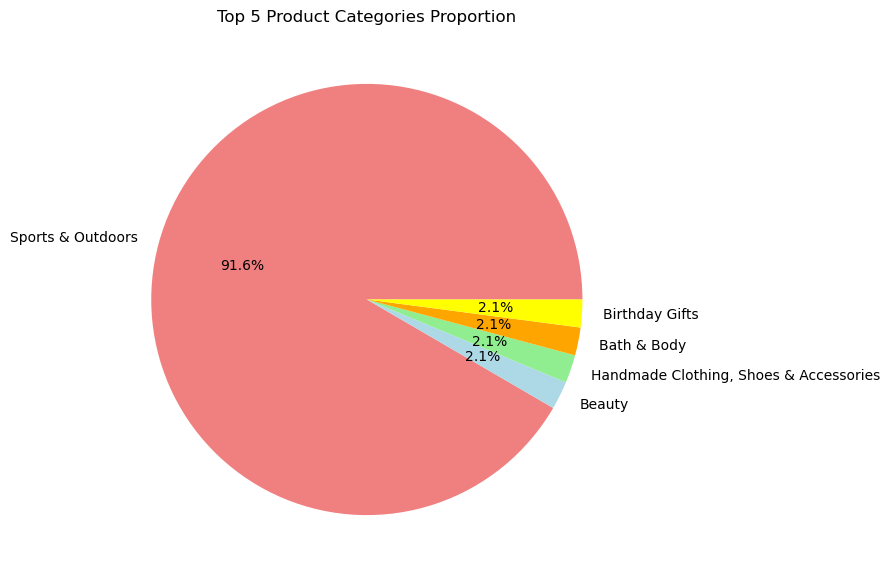

In [8]:
# Pie chart for top 5 product categories
top_5_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['lightcoral', 'lightblue', 'lightgreen', 'orange', 'yellow'])
plt.title('Top 5 Product Categories Proportion')
plt.ylabel('')
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [9]:
# Measures of centrality for product price
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943985244, 19.09, 9.99)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [10]:
# Measures of dispersion for product price
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

variance_price, std_dev_price, range_price, iqr_price

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

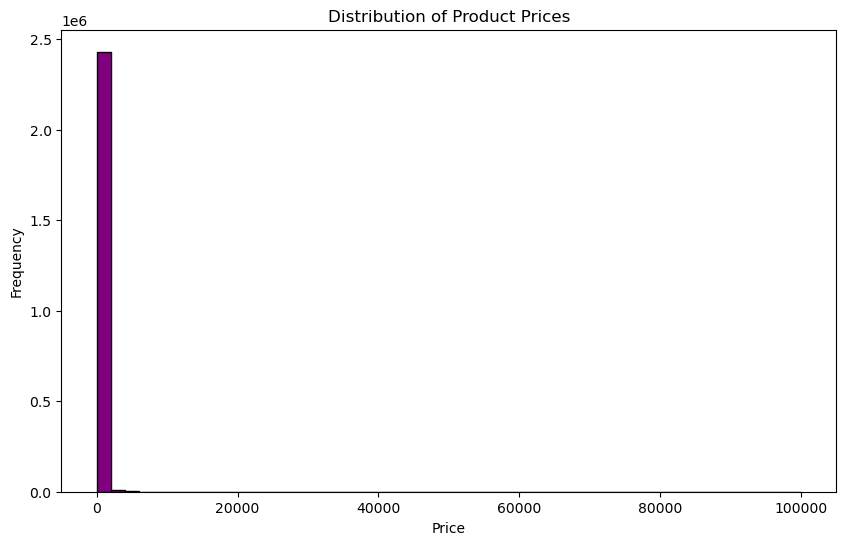

In [11]:
# Histogram of product prices
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

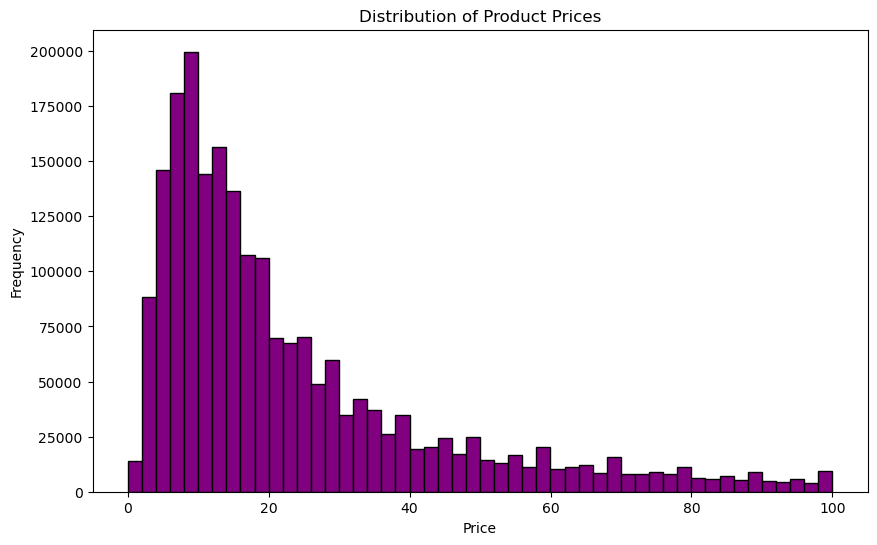

In [12]:
# Histogram of product prices
df_100 = df[df['price'] < 100]
plt.figure(figsize=(10,6))
plt.hist(df_100['price'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

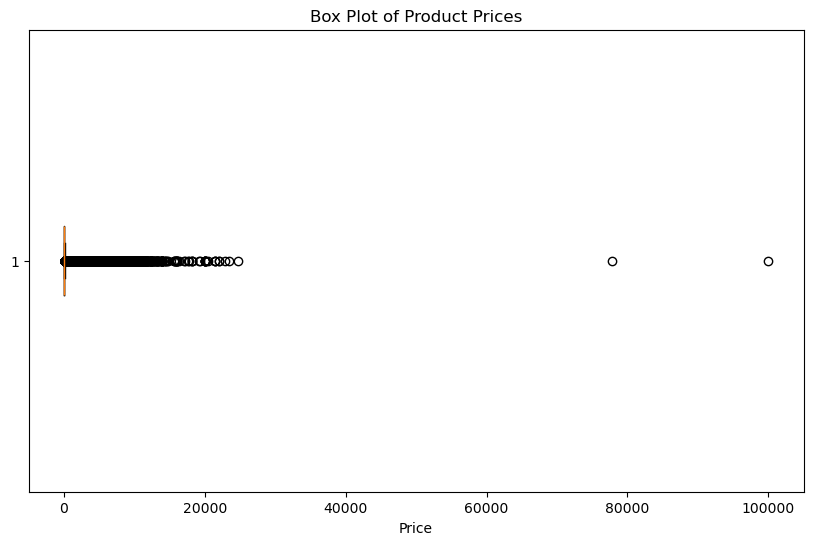

In [13]:
# Box plot of product prices
plt.figure(figsize=(10,6))
plt.boxplot(df['price'], vert=False)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?



In [14]:
# Measures of centrality for product ratings
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966905, 0.0, 0.0)

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?



In [15]:
# Measures of dispersion for product ratings
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
iqr_rating = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

variance_rating, std_dev_rating, iqr_rating

(4.81743402976196, 2.1948653785054697, 4.4)

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [16]:
# Skewness and kurtosis for product ratings
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurt()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

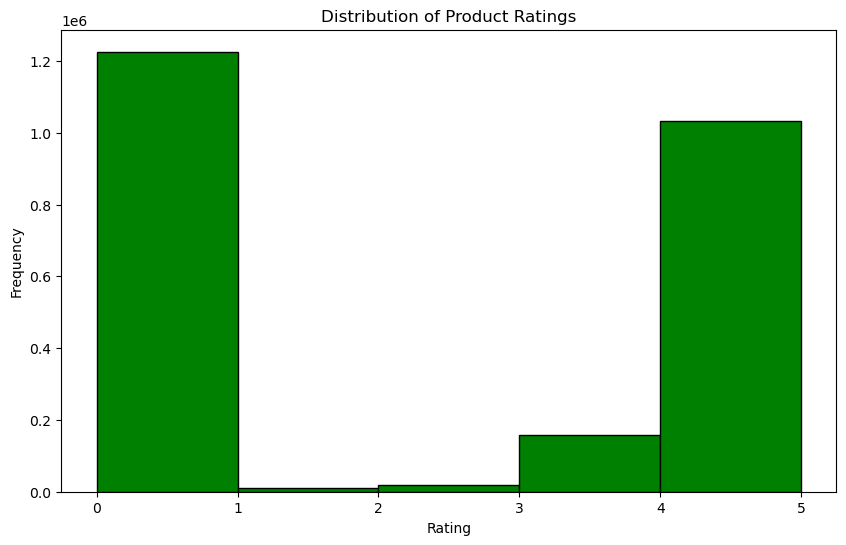

In [17]:
# Histogram of product ratings
plt.figure(figsize=(10,6))
plt.hist(df['stars'], bins=5, color='green', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()